In [0]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing

In [0]:
df = pd.read_csv("/content/drive/My Drive/features_30_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [0]:
df.pivot_table(index =['label'], aggfunc='size')

label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
dtype: int64

In [0]:
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
LE.fit(["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"])
y = LE.transform(df[['label']].values.ravel())
y[0:5]

array([0, 0, 0, 0, 0])

In [0]:
df_dummified = pd.get_dummies(df)
columns = df_dummified.columns
columns.tolist()

In [0]:
X = df[['chroma_stft_mean',
'chroma_stft_var',
'rms_mean',
'rms_var',
'spectral_centroid_mean',
'spectral_centroid_var',
'spectral_bandwidth_mean',
'spectral_bandwidth_var',
'rolloff_mean',
'rolloff_var',
'zero_crossing_rate_mean',
'zero_crossing_rate_var',
'harmony_mean',
'harmony_var',
'perceptr_mean',
'perceptr_var',
'tempo',
'mfcc1_mean',
'mfcc1_var',
'mfcc2_mean',
'mfcc2_var',
'mfcc3_mean',
'mfcc3_var',
'mfcc4_mean',
'mfcc4_var',
'mfcc5_mean',
'mfcc5_var',
'mfcc6_mean',
'mfcc6_var',
'mfcc7_mean',
'mfcc7_var',
'mfcc8_mean',
'mfcc8_var',
'mfcc9_mean',
'mfcc9_var',
'mfcc10_mean',
'mfcc10_var',
'mfcc11_mean',
'mfcc11_var',
'mfcc12_mean',
'mfcc12_var',
'mfcc13_mean',
'mfcc13_var',
'mfcc14_mean',
'mfcc14_var',
'mfcc15_mean',
'mfcc15_var',
'mfcc16_mean',
'mfcc16_var',
'mfcc17_mean',
'mfcc17_var',
'mfcc18_mean',
'mfcc18_var',
'mfcc19_mean',
'mfcc19_var',
'mfcc20_mean',
'mfcc20_var']].values
X[0:5]

array([[ 3.50088120e-01,  8.87565687e-02,  1.30227923e-01,
         2.82669649e-03,  1.78416585e+03,  1.29774065e+05,
         2.00244906e+03,  8.58827613e+04,  3.80583961e+03,
         9.01505426e+05,  8.30448207e-02,  7.66945655e-04,
        -4.52972417e-05,  8.17228202e-03,  7.78323192e-06,
         5.69818215e-03,  1.23046875e+02, -1.13570648e+02,
         2.56420752e+03,  1.21571793e+02,  2.95913818e+02,
        -1.91681423e+01,  2.35574432e+02,  4.23664207e+01,
         1.51106873e+02, -6.36466408e+00,  1.67934799e+02,
         1.86234989e+01,  8.91808395e+01, -1.37048912e+01,
         6.76604919e+01,  1.53431501e+01,  6.89325790e+01,
        -1.22741098e+01,  8.22042007e+01,  1.09765720e+01,
         6.33863106e+01, -8.32657337e+00,  6.17730942e+01,
         8.80379200e+00,  5.12441254e+01, -3.67230010e+00,
         4.12174149e+01,  5.74799490e+00,  4.05544777e+01,
        -5.16288185e+00,  4.97754211e+01,  7.52740204e-01,
         5.24209099e+01, -1.69021463e+00,  3.65240707e+0

In [0]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.35013678,  0.31258717, -0.01068969, -0.06185589, -0.5835852 ,
        -0.84831131, -0.45640248, -0.53104201, -0.48647252, -0.66193361,
        -0.49204509, -0.73434937,  0.19050282, -0.37499162,  0.37275672,
         0.00432643,  0.12536307,  0.30847037, -0.42744458,  0.70309345,
        -0.93639809, -0.47269061, -0.81084363,  0.36466458, -0.59684161,
        -0.42732103, -0.06423578,  0.33717421, -0.55597237, -0.86315362,
        -0.8344325 ,  0.49951802, -0.46959533, -0.63770406, -0.16118663,
         0.40925862, -0.49971511, -0.33836791, -0.36147796,  0.64538476,
        -0.53441001,  0.18219014, -0.80434978,  0.79228723, -0.70309227,
        -0.26555766, -0.38652827, -0.08639575, -0.24611385,  0.50046241,
        -0.78026476, -0.23704039, -0.64317667,  0.00672291, -0.30059734,
         0.60406407, -0.51298758],
       [-0.46248155,  1.11757233, -0.53285232, -0.18682068, -0.93851571,
        -0.23419449, -0.38685162,  0.79625194, -0.64868145,  0.79582332,
        -1.13809

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 57) (800,)
Test set: (200, 57) (200,)


# PCA

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, whiten=True)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


In [0]:
X_train_pca[0:5]

array([[-0.02343213,  0.9002628 , -0.62861081,  0.14047274,  0.74276133,
        -1.95163269, -0.28471229, -0.15181225, -0.94856135, -0.62928117,
        -0.0515788 , -1.34512809,  0.98589882,  1.74987985,  0.10027875],
       [-1.01683182, -0.68345263, -0.40458095,  0.2645629 ,  0.1595576 ,
         0.02271784,  0.48070993, -0.61071046, -1.63972088, -0.21966964,
        -0.68369398,  0.04625481, -1.2410284 , -0.84123349, -0.94634802],
       [-1.50160491, -0.30542136,  0.50945264, -0.61549732, -0.32193425,
        -0.86119543,  0.33406606,  0.56676144,  1.10726643,  0.54174708,
        -0.43332332,  0.83386272,  1.50684627,  0.43187746,  0.16616811],
       [ 1.57915912, -2.40989425,  0.89730926,  2.26882645,  1.10780383,
        -0.12766828, -1.34431766,  2.60009742,  0.31584733,  2.77635522,
        -1.77031817,  1.60977677, -1.12501158,  2.37795069, -1.35962026],
       [-0.20170828, -1.41028735, -1.89301113, -0.51447751,  0.35764787,
         1.15199861,  0.21876501, -0.97533865, 

In [0]:
X_test_pca[0:5]

array([[-0.81041971,  0.46264166,  0.35473303, -0.41655185,  1.2143652 ,
        -0.03994498, -1.06603036, -1.08621   , -0.15842847, -0.20646595,
         1.18633053,  0.60125744, -0.32102848,  0.82327073,  1.02527762],
       [-0.13040135,  0.11808665, -1.45106451,  1.0194964 , -1.50696099,
        -0.09778628,  0.61566977,  0.73120425,  0.14947766,  0.3912547 ,
         2.34516697,  1.31326188,  0.19738521, -1.37870479,  0.19879172],
       [ 0.51207349, -0.30484772, -0.76391592,  0.59046569, -0.31876166,
         0.2480318 ,  0.56652958, -0.78684862, -0.76843929, -0.43593526,
        -1.00678233, -2.00174777,  0.94760971,  1.7316468 , -1.1954555 ],
       [ 0.33349538,  1.44208055, -0.80884649,  0.79780028, -1.39238768,
        -0.566007  ,  0.18524356, -0.23623687, -0.25606403, -1.15910843,
        -0.36949063, -1.17947818, -0.40168494, -0.05144129,  0.45126655],
       [ 0.26511441, -1.23780139, -1.00144262,  0.80478121,  1.39938082,
         0.43808418,  0.89031181, -0.35643884, 

# K-Neighbors Classifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [0]:
# Find the best K
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_pca,y_train)
    yhat=neigh.predict(X_test_pca)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.595, 0.535, 0.565, 0.555, 0.585, 0.57 , 0.58 , 0.585, 0.6  ,
       0.61 , 0.625, 0.595, 0.63 , 0.585, 0.59 , 0.62 , 0.63 , 0.645,
       0.63 , 0.605, 0.62 , 0.62 , 0.605, 0.605, 0.6  , 0.595, 0.6  ,
       0.61 , 0.585, 0.585, 0.58 , 0.585, 0.58 , 0.59 , 0.585, 0.575,
       0.56 , 0.54 , 0.53 , 0.565, 0.545, 0.555, 0.55 , 0.555, 0.555,
       0.56 , 0.55 , 0.545, 0.56 , 0.565, 0.56 , 0.565, 0.55 , 0.555,
       0.555, 0.56 , 0.555, 0.555, 0.555, 0.555, 0.55 , 0.545, 0.54 ,
       0.54 , 0.54 , 0.545, 0.54 , 0.535, 0.53 , 0.525, 0.52 , 0.52 ,
       0.525, 0.54 , 0.54 , 0.545, 0.535, 0.525, 0.525, 0.53 , 0.53 ,
       0.535, 0.54 , 0.54 , 0.545, 0.535, 0.535, 0.545, 0.54 , 0.54 ,
       0.535, 0.53 , 0.515, 0.52 , 0.535, 0.54 , 0.535, 0.525, 0.535])

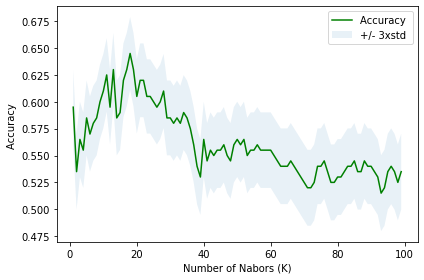

In [0]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [0]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.645 with k= 18


# K-Neighbors Classifier (Without PCA)

In [0]:
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.625, 0.605, 0.615, 0.625, 0.63 , 0.615, 0.625, 0.645, 0.65 ,
       0.62 , 0.655, 0.63 , 0.635, 0.63 , 0.635, 0.61 , 0.62 , 0.61 ,
       0.64 , 0.64 , 0.635, 0.605, 0.595, 0.595, 0.59 , 0.58 , 0.57 ,
       0.58 , 0.585, 0.595, 0.59 , 0.585, 0.585, 0.58 , 0.57 , 0.58 ,
       0.57 , 0.58 , 0.565, 0.565, 0.565, 0.565, 0.575, 0.575, 0.57 ,
       0.56 , 0.565, 0.56 , 0.565, 0.565, 0.545, 0.53 , 0.53 , 0.535,
       0.535, 0.535, 0.53 , 0.53 , 0.52 , 0.52 , 0.52 , 0.515, 0.525,
       0.525, 0.53 , 0.52 , 0.51 , 0.515, 0.515, 0.52 , 0.52 , 0.525,
       0.51 , 0.49 , 0.495, 0.495, 0.495, 0.495, 0.49 , 0.495, 0.505,
       0.515, 0.51 , 0.505, 0.5  , 0.495, 0.49 , 0.485, 0.49 , 0.49 ,
       0.495, 0.495, 0.49 , 0.485, 0.49 , 0.485, 0.48 , 0.485, 0.485])

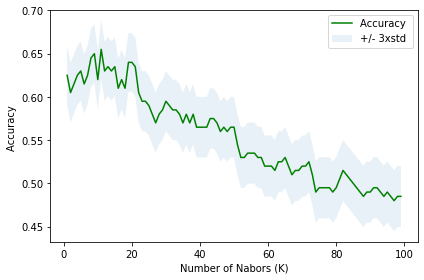

In [0]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [0]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.655 with k= 11


# Support Vector Machine

In [0]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train_pca, y_train)

yhat = clf.predict(X_test_pca)
yhat [0:5]

array([6, 5, 2, 7, 5])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        19
           1       0.90      0.86      0.88        21
           2       0.68      0.57      0.62        23
           3       0.38      0.42      0.40        19
           4       0.45      0.72      0.55        18
           5       0.76      0.86      0.81        22
           6       0.89      0.89      0.89        18
           7       0.80      0.67      0.73        24
           8       0.50      0.50      0.50        16
           9       0.37      0.35      0.36        20

    accuracy                           0.63       200
   macro avg       0.63      0.63      0.62       200
weighted avg       0.64      0.63      0.63       200

Confusion matrix, without normalization
[[ 8  0  1  2  1  0  0  0  2  5]
 [ 0 18  0  0  0  3  0  0  0  0]
 [ 1  0 13  4  0  1  0  1  1  2]
 [ 0  0  0  8  5  0  1  1  0  4]
 [ 0  0  0  0 13  0  0  1  4  0]
 [ 1  1  0  0  0 19  0  0  0  1]
 [ 

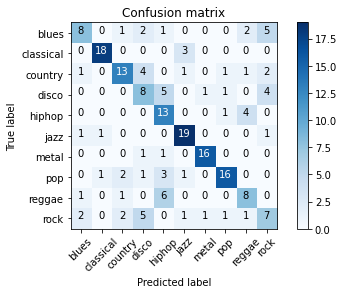

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],normalize= False,  title='Confusion matrix')

# Support Vector Machine (Without PCA)


In [0]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

yhat = clf.predict(X_test)
yhat [0:5]

array([6, 5, 2, 7, 5])

              precision    recall  f1-score   support

           0       0.92      0.63      0.75        19
           1       0.95      1.00      0.98        21
           2       0.74      0.61      0.67        23
           3       0.48      0.58      0.52        19
           4       0.58      0.78      0.67        18
           5       0.87      0.91      0.89        22
           6       0.82      1.00      0.90        18
           7       0.95      0.75      0.84        24
           8       0.57      0.50      0.53        16
           9       0.48      0.50      0.49        20

    accuracy                           0.73       200
   macro avg       0.74      0.73      0.72       200
weighted avg       0.75      0.73      0.73       200

Confusion matrix, without normalization
[[12  0  0  2  0  0  0  0  0  5]
 [ 0 21  0  0  0  0  0  0  0  0]
 [ 0  0 14  4  0  1  0  1  0  3]
 [ 0  0  0 11  5  0  0  0  0  3]
 [ 0  0  0  0 14  0  0  0  4  0]
 [ 0  1  0  1  0 20  0  0  0  0]
 [ 

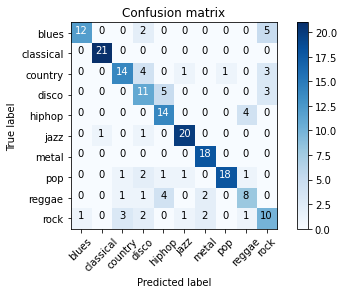

In [0]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],normalize= False,  title='Confusion matrix')

# Convolutional neural network (CNN)

[Computing in neuron network](https://www.youtube.com/watch?v=QUCzvlgvk6I&list=PL-wATfeyAMNrtbkCNsLcpoAyBBRJZVlnf&index=5)

